In [1]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
from   IPython.display                 import  display
from   pylab                           import  rcParams 
from   datetime                        import  datetime, timedelta
from   pandas.tseries.offsets          import BDay
from statsmodels.tsa.stattools         import  adfuller
from statsmodels.tsa.stattools         import  pacf
from statsmodels.tsa.stattools         import  acf
from statsmodels.graphics.tsaplots     import  plot_pacf
from statsmodels.graphics.tsaplots     import  plot_acf
from statsmodels.graphics.gofplots     import  qqplot
from statsmodels.tsa.seasonal          import  seasonal_decompose
from   statsmodels.tsa.api             import  ExponentialSmoothing,Holt
# from statsmodels.tsa.arima_model       import  ARIMA
from sklearn.metrics                   import  mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import itertools
from statsmodels.tsa.arima.model import ARIMA  # new import
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [2]:
df = pd.read_csv('shampoo.csv')
df

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


In [3]:
print(f"\n Number of Rows:{df.shape[0]}")
print(f"\n Number of Columns:{df.shape[1]}")
print("Data Types")
df.dtypes


 Number of Rows:36

 Number of Columns:2
Data Types


Month     object
Sales    float64
dtype: object

In [4]:
def to_date(x):
    year = 2000+ int(x.split('-')[0])
    month = int(x.split('-')[1])
    return pd.Timestamp(year = year, month = month , day = 1)
df['Month'] = df['Month'].apply(to_date) 

In [5]:
df['Month']

0    2001-01-01
1    2001-02-01
2    2001-03-01
3    2001-04-01
4    2001-05-01
5    2001-06-01
6    2001-07-01
7    2001-08-01
8    2001-09-01
9    2001-10-01
10   2001-11-01
11   2001-12-01
12   2002-01-01
13   2002-02-01
14   2002-03-01
15   2002-04-01
16   2002-05-01
17   2002-06-01
18   2002-07-01
19   2002-08-01
20   2002-09-01
21   2002-10-01
22   2002-11-01
23   2002-12-01
24   2003-01-01
25   2003-02-01
26   2003-03-01
27   2003-04-01
28   2003-05-01
29   2003-06-01
30   2003-07-01
31   2003-08-01
32   2003-09-01
33   2003-10-01
34   2003-11-01
35   2003-12-01
Name: Month, dtype: datetime64[ns]

In [6]:
df['Date'] = pd.to_datetime(df['Month'], format = '%Y-%m-%d')
df['Date']

0    2001-01-01
1    2001-02-01
2    2001-03-01
3    2001-04-01
4    2001-05-01
5    2001-06-01
6    2001-07-01
7    2001-08-01
8    2001-09-01
9    2001-10-01
10   2001-11-01
11   2001-12-01
12   2002-01-01
13   2002-02-01
14   2002-03-01
15   2002-04-01
16   2002-05-01
17   2002-06-01
18   2002-07-01
19   2002-08-01
20   2002-09-01
21   2002-10-01
22   2002-11-01
23   2002-12-01
24   2003-01-01
25   2003-02-01
26   2003-03-01
27   2003-04-01
28   2003-05-01
29   2003-06-01
30   2003-07-01
31   2003-08-01
32   2003-09-01
33   2003-10-01
34   2003-11-01
35   2003-12-01
Name: Date, dtype: datetime64[ns]

In [7]:
df = df.set_index('Date')
df = df.drop('Month', axis = 1)
df = df.sort_index()
df

,Sales
Date,
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3
2001-06-01,168.5
2001-07-01,231.8
2001-08-01,224.5
2001-09-01,192.8


In [8]:
print(f"\n Missing values:{df.isnull().sum()}")
print(f"\n NA values:{df.isna().sum()}")
print(f"\n Duplicated values:{df.duplicated().sum()}")


 Missing values:Sales    0
dtype: int64

 NA values:Sales    0
dtype: int64

 Duplicated values:0


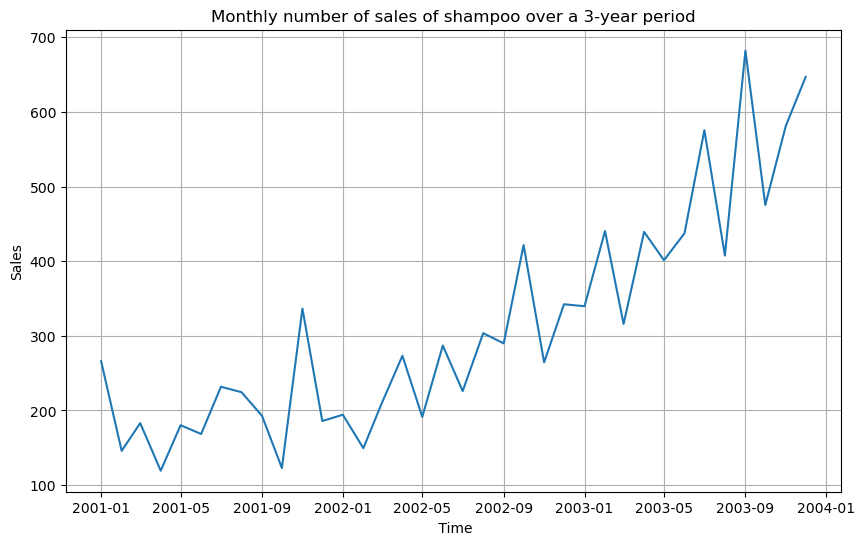

In [9]:
plt.figure(figsize =( 10,6))
plt.title('Monthly number of sales of shampoo over a 3-year period')
plt.plot(df.index, df['Sales'])
plt.xlabel(' Time')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

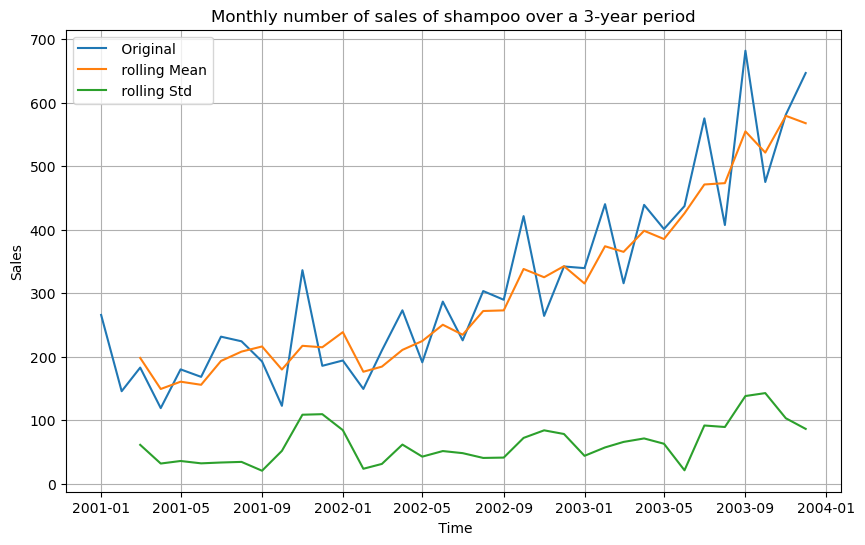

In [10]:

rm = df.rolling(window =3).mean()
rd = df.rolling(window = 3).std()
plt.figure(figsize =( 10,6))
plt.title('Monthly number of sales of shampoo over a 3-year period')
plt.plot(df.index, df['Sales'],label = ' Original')
plt.plot(df.index, rm, label = ' rolling Mean')
plt.plot(df.index, rd,label = ' rolling Std')
plt.xlabel(' Time')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.show()

#### b)	Decompose the time series and check for components of time series. (4 marks) Perform dicky fuller test to check the stationarity? What other actions will you take if series is non-stationary? (3+2 marks) Plot Auto Correlation and Partial Auto Correlation function? What is your inference from these plots?  (3+3 marks)


 Seaconal decompose with Additive model 


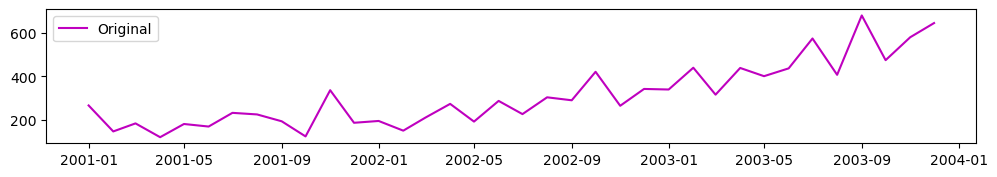

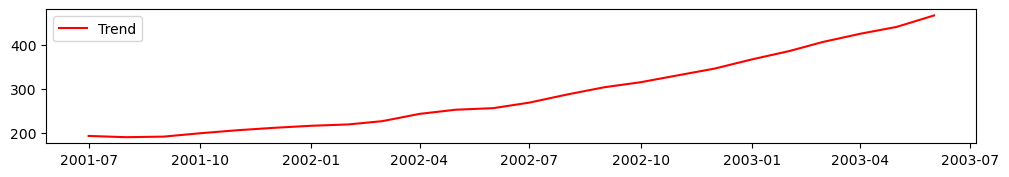

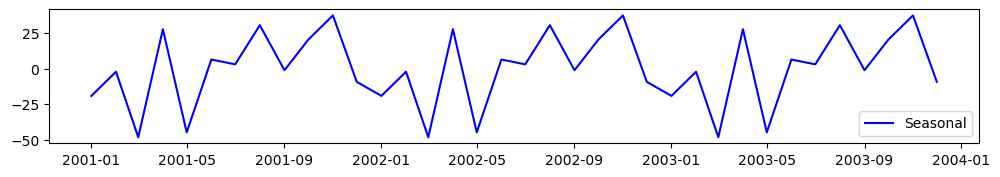

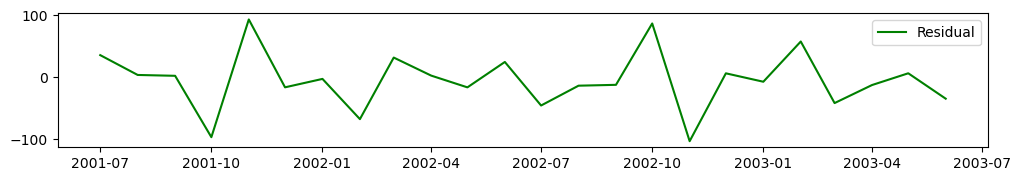

In [11]:
decom = seasonal_decompose(df['Sales'],model='additive',period=12)

print(" Seaconal decompose with Additive model ")
plt.figure(figsize=(12, 8))
plt.subplot( 4,1,1)
plt.plot(df.index , decom.observed , label = 'Original',color ='m')
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
plt.subplot( 4,1,1)
plt.plot(df.index , decom.trend , label = 'Trend',color ='r')
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
plt.subplot( 4,1,2)
plt.plot(df.index , decom.seasonal , label = 'Seasonal',color ='b')
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
plt.subplot( 4,1,3)
plt.plot(df.index , decom.resid , label = 'Residual', color ='g')
plt.legend()
plt.show()




 Seaconal decompose with multiplicative model 


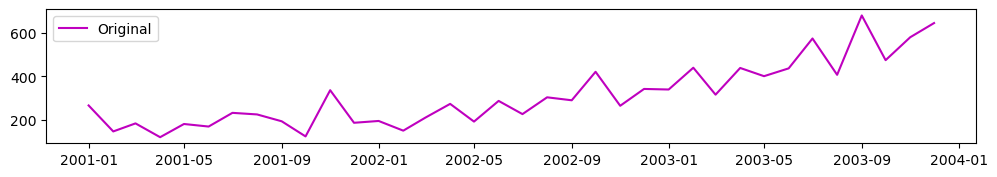

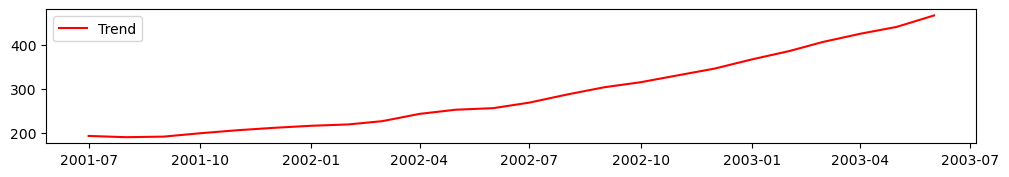

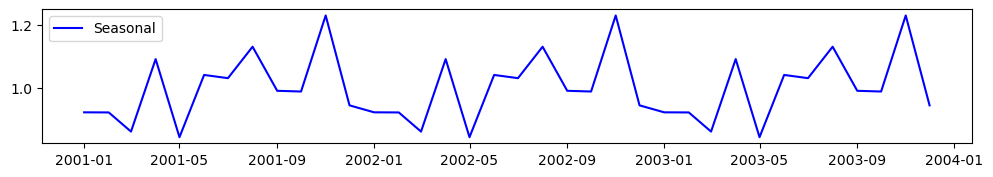

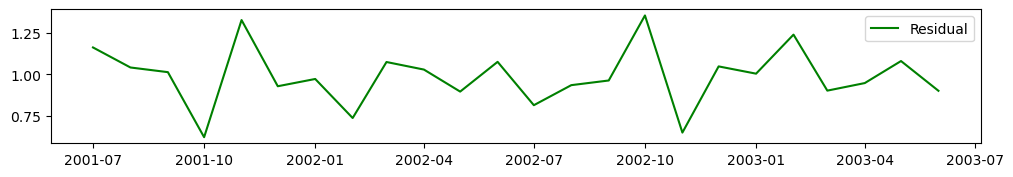

In [12]:
decom = seasonal_decompose(df['Sales'],model='multiplicative',period=12)

print(" Seaconal decompose with multiplicative model ")
plt.figure(figsize=(12, 8))
plt.subplot( 4,1,1)
plt.plot(df.index , decom.observed , label = 'Original',color ='m')
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
plt.subplot( 4,1,1)
plt.plot(df.index , decom.trend , label = 'Trend',color ='r')
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
plt.subplot( 4,1,2)
plt.plot(df.index , decom.seasonal , label = 'Seasonal',color ='b')
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
plt.subplot( 4,1,3)
plt.plot(df.index , decom.resid , label = 'Residual', color ='g')
plt.legend()
plt.show()




In [13]:
print('Perform dicky fuller test to check the stationarity \n')
results = adfuller(df['Sales'])
p_val = results[1]

print('P-value is:', p_val)

if p_val < 0.05:
    print(' Time series is Stationary')
else:
    print(' Time series is Non-Stationary\n')
    print('Actions to convert Non-Stationary to Stationary:')
    print('1. Differencing Method')
    print('2. Log Transform')
    print('3. Seasonal Differencing')
    print('4. Detrending')
    print('5. Smoothing')
    print('-------------------------------------')

    # Apply 1. Differencing Method
    print(' Applying Differencing...')
    df_diff = df['Sales'].diff().dropna()

    results_df = adfuller(df_diff)
    p_val_df = results_df[1]
    print('P-value after differencing:', p_val_df)

    if p_val_df < 0.05:
        print(' Time series is Stationary after differencing')
    else:
        print(' Time series is still Non-Stationary after differencing')
        print(' Applying Log Transform on Differenced Series...')
        df_log_diff = np.log(df_diff).dropna()

        results_df_log = adfuller(df_log_diff)
        p_val_df_log = results_df_log[1]
        print('P-value after log transform on differenced series:', p_val_df_log)

        if p_val_df_log < 0.05:
            print(' Time series is Stationary after log transform')
        else:
            print(' Time series is still Non-Stationary')


Perform dicky fuller test to check the stationarity 

P-value is: 1.0
 Time series is Non-Stationary

Actions to convert Non-Stationary to Stationary:
1. Differencing Method
2. Log Transform
3. Seasonal Differencing
4. Detrending
5. Smoothing
-------------------------------------
 Applying Differencing...
P-value after differencing: 1.7998574141686703e-10
 Time series is Stationary after differencing


#### Plot Auto Correlation and Partial Auto Correlation function? What is your inference from these plots?  (3+3 marks)


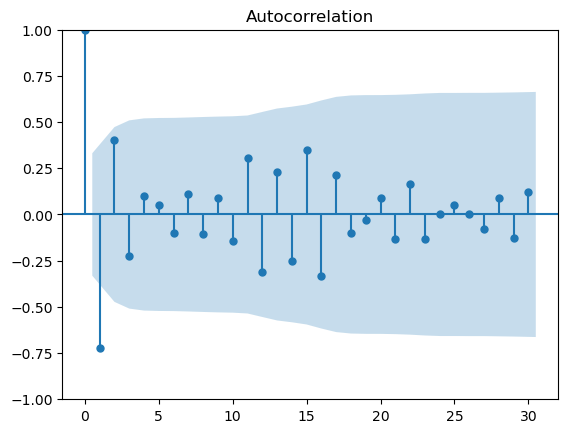

In [14]:
plot_acf(df_diff, lags = 30)
plt.show()

ACF (Autocorrelation Function) measures total correlation between present and past values.

Lag 0: Always equals 1 (perfect self-correlation).

Lag 1: A significant negative spike indicates strong inverse correlation with previous value.

Lags 2 to 30: Most values lie within the confidence interval, so they are not statistically significant.

This pattern suggests the series follows an MA(1) process (Moving Average of order 1).

No visible seasonal spikes at lag 12, 24, etc., so no strong seasonality is present.

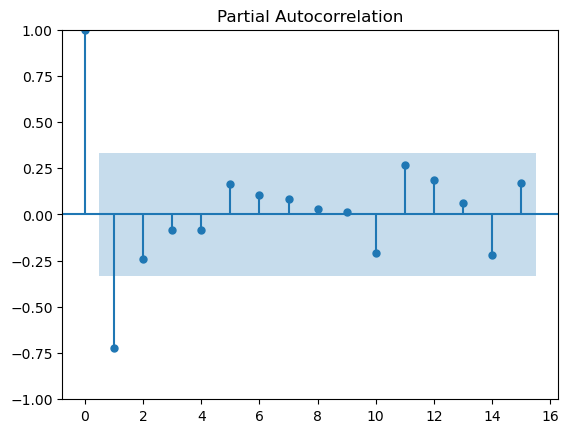

In [15]:
plot_pacf(df_diff, lags = 15)
plt.show()

The PACF plot shows a significant spike at lag 1, indicating a strong direct relationship with the immediate past value.

All other lags beyond lag 1 are within the blue confidence interval, indicating no significant direct correlation.

The PACF cuts off sharply after lag 1, which suggests the presence of an AR(1) process (Auto-Regressive of order 1).

The absence of significant spikes at higher lags implies that additional AR terms are not needed.

No signs of seasonality are observed (i.e., no repeating spikes at fixed intervals like lag 12).

In [16]:
split = int(len(df) * 0.7)
split

25

In [17]:
x = df.iloc[:split]
x.shape

(25, 1)

In [18]:
y = df.iloc[split:]
y.shape

(11, 1)

In [19]:
p = q = range(0,4)
d = range(0,2)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

In [20]:
for i in range ( 1, len(pdq)):
    print('Model:{}'.format(pdq[i]))

Model:(0, 0, 1)
Model:(0, 0, 2)
Model:(0, 0, 3)
Model:(0, 1, 0)
Model:(0, 1, 1)
Model:(0, 1, 2)
Model:(0, 1, 3)
Model:(1, 0, 0)
Model:(1, 0, 1)
Model:(1, 0, 2)
Model:(1, 0, 3)
Model:(1, 1, 0)
Model:(1, 1, 1)
Model:(1, 1, 2)
Model:(1, 1, 3)
Model:(2, 0, 0)
Model:(2, 0, 1)
Model:(2, 0, 2)
Model:(2, 0, 3)
Model:(2, 1, 0)
Model:(2, 1, 1)
Model:(2, 1, 2)
Model:(2, 1, 3)
Model:(3, 0, 0)
Model:(3, 0, 1)
Model:(3, 0, 2)
Model:(3, 0, 3)
Model:(3, 1, 0)
Model:(3, 1, 1)
Model:(3, 1, 2)
Model:(3, 1, 3)


In [21]:
result_list = []
for param in pdq:
    model =ARIMA(x['Sales'],order = param)
    results = model.fit()
    print(f'ARIMA{param} - AIC:{results.aic:.4f}')
    result_list.append( {'param':param, 'AIC':results.aic})

df_results = pd.DataFrame(result_list)

df_results = df_results.sort_values(by='AIC',ascending=True)

top_5 = df_results.head(5)
print ( ' Top_5', top_5)

ARIMA(0, 0, 0) - AIC:290.9191
ARIMA(0, 0, 1) - AIC:291.6134
ARIMA(0, 0, 2) - AIC:289.8469
ARIMA(0, 0, 3) - AIC:291.5676
ARIMA(0, 1, 0) - AIC:284.9883
ARIMA(0, 1, 1) - AIC:274.2818
ARIMA(0, 1, 2) - AIC:273.9849
ARIMA(0, 1, 3) - AIC:275.5261
ARIMA(1, 0, 0) - AIC:290.4303
ARIMA(1, 0, 1) - AIC:288.5398
ARIMA(1, 0, 2) - AIC:288.2269
ARIMA(1, 0, 3) - AIC:288.5574
ARIMA(1, 1, 0) - AIC:273.8965
ARIMA(1, 1, 1) - AIC:273.9883
ARIMA(1, 1, 2) - AIC:275.4842
ARIMA(1, 1, 3) - AIC:277.4032
ARIMA(2, 0, 0) - AIC:286.7209
ARIMA(2, 0, 1) - AIC:288.2697
ARIMA(2, 0, 2) - AIC:289.8832
ARIMA(2, 0, 3) - AIC:291.7901
ARIMA(2, 1, 0) - AIC:275.2250
ARIMA(2, 1, 1) - AIC:275.9243
ARIMA(2, 1, 2) - AIC:277.4630
ARIMA(2, 1, 3) - AIC:278.4653
ARIMA(3, 0, 0) - AIC:288.5839
ARIMA(3, 0, 1) - AIC:290.2206
ARIMA(3, 0, 2) - AIC:291.8614
ARIMA(3, 0, 3) - AIC:291.0786
ARIMA(3, 1, 0) - AIC:274.3389
ARIMA(3, 1, 1) - AIC:276.2872
ARIMA(3, 1, 2) - AIC:273.0692
ARIMA(3, 1, 3) - AIC:274.9546
 Top_5         param         AIC
30  (3,

In [22]:
best_order  = (3, 1, 2)

model = ARIMA(x['Sales'], order = best_order)
model_fit = model.fit()
print(model_fit.summary())

forecast = model_fit.forecast(len(y))
forecast.index = y.index

rmse = np.sqrt(mean_squared_error(y['Sales'], forecast))
rmse


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   25
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -130.535
Date:                Fri, 20 Jun 2025   AIC                            273.069
Time:                        13:40:54   BIC                            280.138
Sample:                    01-01-2001   HQIC                           274.944
                         - 01-01-2003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1522      0.343     -0.444      0.657      -0.824       0.520
ar.L2         -0.4743      0.226     -2.094      0.036      -0.918      -0.030
ar.L3         -0.6385      0.259     -2.465      0.0

177.7278543775807

In [23]:
rmse = np.sqrt(mean_squared_error(y['Sales'], forecast))
mape = mean_absolute_percentage_error(y['Sales'], forecast) * 100  # In %

print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2f}%')


RMSE: 177.73
MAPE: 27.02%


In [24]:

actual = y['Sales'].values
predicted = forecast.values

# Avoid division by zero by adding a small epsilon or filtering
mape = np.mean(np.abs((actual - predicted) / actual)) * 100
print(f'MAPE: {mape:.2f}%')


MAPE: 27.02%


## Fit exponential smoothing model and observe the residuals, RMSE and MAPE values of the model for test data. 

In [25]:

# Assuming x = train, y = test

# 1. Fit the model
model = ExponentialSmoothing(x['Sales'], trend='add', seasonal=None)
model_fit = model.fit()

# 2. Forecast
forecast = model_fit.forecast(steps=len(y))

# 3. Summary (optional, useful)
print(model_fit.summary())

# 4. RMSE (make sure to import or define mean_squared_error or use manual version)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y['Sales'], forecast))
print('RMSE:', rmse)

# 5. MAPE (manual, no import needed)
actual = y['Sales'].values
predicted = forecast.values
mape = np.mean(np.abs((actual - predicted) / actual)) * 100
print('MAPE:', mape)

# ✅ 6. Residuals — FIXED (your line was a statement, not an assignment)
residuals = actual - predicted

               

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Sales   No. Observations:                   25
Model:             ExponentialSmoothing   SSE                          81133.517
Optimized:                         True   AIC                            210.124
Trend:                         Additive   BIC                            215.000
Seasonal:                          None   AICC                           214.791
Seasonal Periods:                  None   Date:                 Fri, 20 Jun 2025
Box-Cox:                          False   Time:                         13:40:55
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level           1.4901e-08                alpha                 True
smoothing_trend           2.5439e-

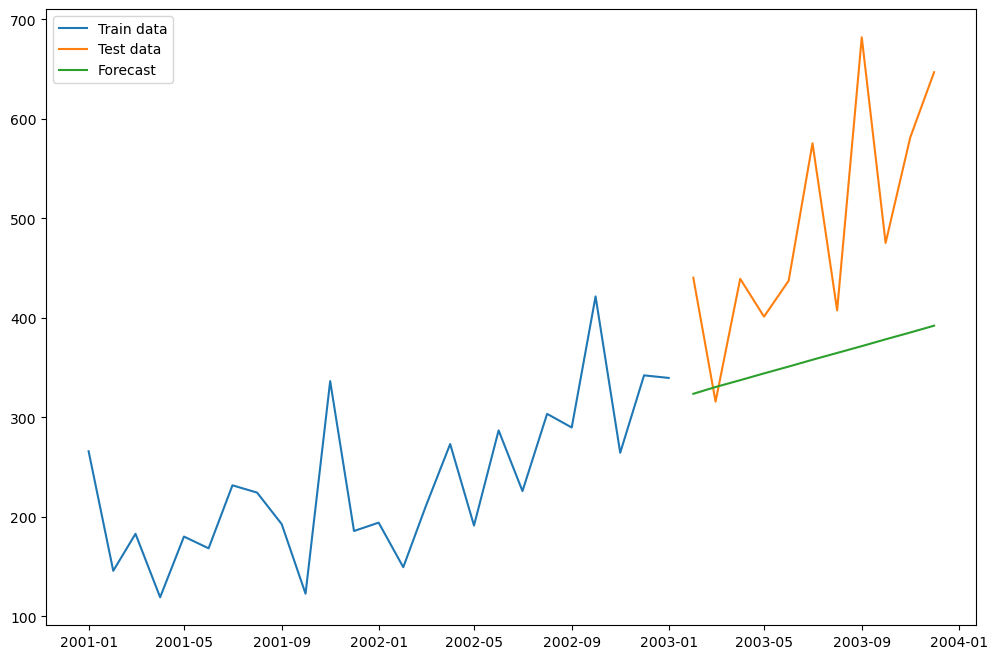

In [26]:
plt.figure(figsize= ( 12,8))
plt.plot(x['Sales'], label = 'Train data')
plt.plot(y['Sales'], label = 'Test data')
plt.plot ( forecast, label = 'Forecast')
plt.legend()
plt.show()


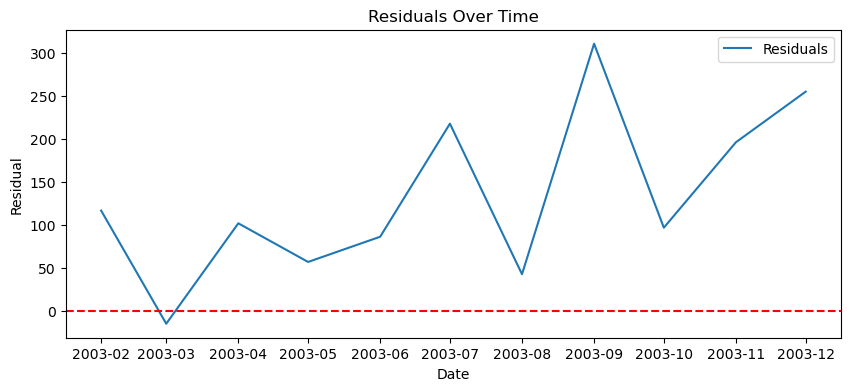

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume 'residuals' is already computed: residuals = actual - predicted
residuals_series = pd.Series(residuals, index=y.index)

plt.figure(figsize=(10, 4))
plt.plot(residuals_series, label='Residuals')
plt.axhline(0, linestyle='--', color='red')
plt.title("Residuals Over Time")
plt.xlabel("Date")
plt.ylabel("Residual")
plt.legend()
plt.show()


In [28]:
# 1. Fit the model
model = ExponentialSmoothing(x['Sales'], 
                             trend='mul',
                             seasonal='mul',
                              damped_trend=True,
                             seasonal_periods=12
                            )
model_fit = model.fit()

# 2. Forecast
forecast = model_fit.forecast(steps=len(y))

# 3. Summary (optional, useful)
print(model_fit.summary())

# 4. RMSE (make sure to import or define mean_squared_error or use manual version)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y['Sales'], forecast))
print('RMSE:', rmse)

# 5. MAPE (manual, no import needed)
actual = y['Sales'].values
predicted = forecast.values
mape = np.mean(np.abs((actual - predicted) / actual)) * 100
print('MAPE:', mape)

# ✅ 6. Residuals — FIXED (your line was a statement, not an assignment)
residuals = actual - predicted

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Sales   No. Observations:                   25
Model:             ExponentialSmoothing   SSE                         174436.220
Optimized:                         True   AIC                            255.261
Trend:                   Multiplicative   BIC                            275.982
Seasonal:                Multiplicative   AICC                           407.261
Seasonal Periods:                    12   Date:                 Fri, 20 Jun 2025
Box-Cox:                          False   Time:                         13:40:55
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0403571                alpha                 True
smoothing_trend          

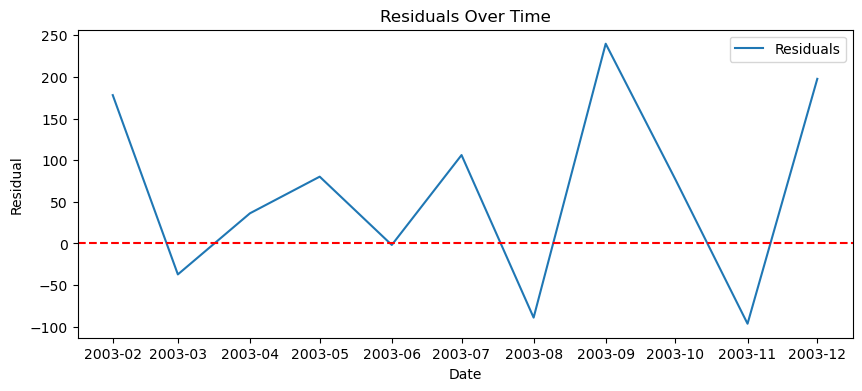

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume 'residuals' is already computed: residuals = actual - predicted
residuals_series = pd.Series(residuals, index=y.index)

plt.figure(figsize=(10, 4))
plt.plot(residuals_series, label='Residuals')
plt.axhline(0, linestyle='--', color='red')
plt.title("Residuals Over Time")
plt.xlabel("Date")
plt.ylabel("Residual")
plt.legend()
plt.show()


Forecast for next 6 months:
2003-02-01    262.252614
2003-03-01    353.100176
2003-04-01    403.106185
2003-05-01    321.088038
2003-06-01    439.219984
2003-07-01    469.334844
Freq: MS, dtype: float64


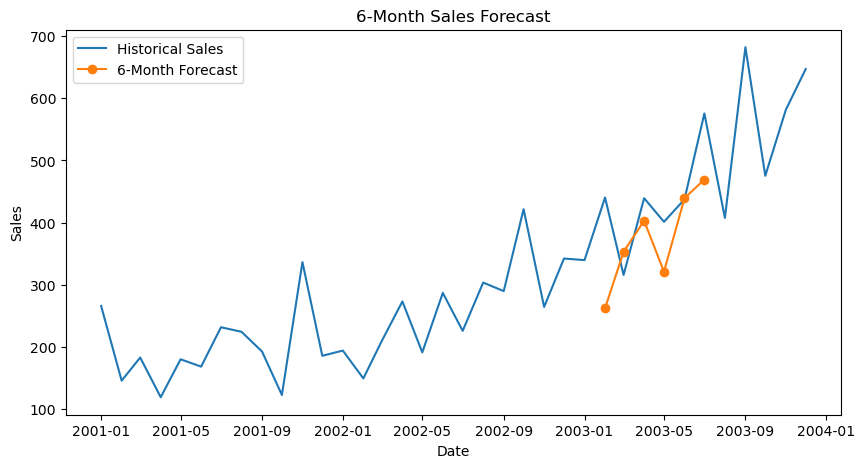

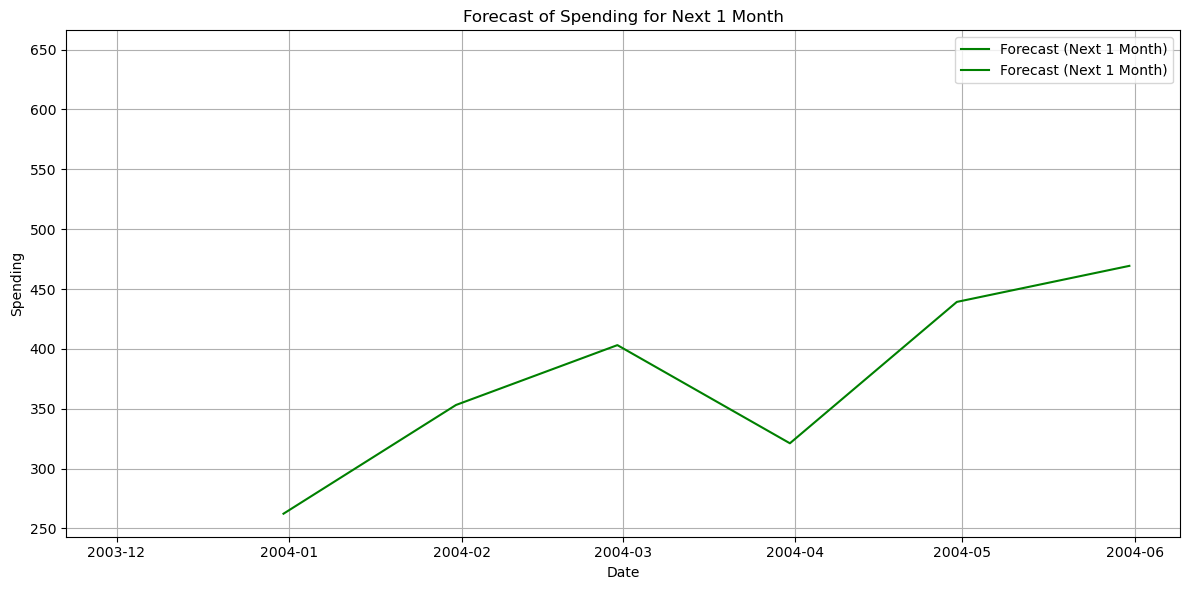

In [39]:
# Forecast next 6 months
forecast_6months = model_fit.forecast(steps=6)

# If you used log-transformed data, remember to inverse-transform:
# forecast_6months = np.exp(forecast_6months)

print("Forecast for next 6 months:")
print(forecast_6months)

# Optional: plot the forecast along with historical data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Sales'], label='Historical Sales')
plt.plot(forecast_6months.index, forecast_6months, label='6-Month Forecast', marker='o')
plt.title('6-Month Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

########################################
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=6, freq='M')

# Step 3: Combine actual last point + forecast to ensure continuity
combined_forecast = pd.concat([df[-1:], pd.Series(forecast_6months.values, index=future_dates)])

# Step 4: Plot
plt.figure(figsize=(12, 6))



# Forecast including the last actual point for smooth line
plt.plot(combined_forecast.index, combined_forecast.values, label='Forecast (Next 1 Month)', color='green')

plt.title("Forecast of Spending for Next 1 Month")
plt.xlabel("Date")
plt.ylabel("Spending")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


